In [1]:
# Compute the SSIM between two images.

from skimage.metrics import structural_similarity as ssim
import cv2
import sys
import numpy as np

def compute_ssim(img1, img2):
    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    return ssim(img1, img2)


In [2]:
import os
import pandas as pd
reference_image = "out/GT/rendered_image_BMC_IS_150_GP_10_samples.png"
results_path = 'out/Results'

# Number of methods is the number of folders in the results path
number_of_methods = len([name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))])

# Number of samples is the number of images in the first method 
first_method_path = sorted(os.listdir(results_path))[0]
number_of_samples = len(os.listdir(os.path.join(results_path, first_method_path))) // 3

print("Number of methods: ", number_of_methods)
print("Number of samples: ", number_of_samples)

samples_values = [5, 20]

df = pd.DataFrame(columns=['Method', 'Samples', 'SSIM'])

for i, method in enumerate(sorted(os.listdir(results_path))):
    method_path = os.path.join(results_path, method)
    image_list = [image for image in os.listdir(method_path) if image.endswith('.png')]
    for j, image in enumerate(sorted(image_list)):
            print("Computing SSIM", os.path.join(method_path, image))
            # Get the samples value using hte first number of the image name 
            # First divide the image name by the underscore
            image_name = image.split('_')
            # Get the first number
            for string in image_name:
                if string.isdigit():
                    samples = int(string)
                    break
            print("Samples: ", samples)
            sim = compute_ssim(reference_image, os.path.join(method_path, image))
            df = df.append({'Method': method, 'Samples': samples, 'SSIM': sim}, ignore_index=True)

Number of methods:  4
Number of samples:  2
Computing SSIM out/Results/BMC/rendered_image_BMC_20_GP_5_samples.png
Samples:  20
Computing SSIM out/Results/BMC/rendered_image_BMC_5_GP_5_samples.png
Samples:  5
Computing SSIM out/Results/BMC_IS/rendered_image_BMC_IS_20_GP_5_samples.png
Samples:  20
Computing SSIM out/Results/BMC_IS/rendered_image_BMC_IS_5_GP_5_samples.png
Samples:  5
Computing SSIM out/Results/MC/rendered_image_MC_20_samples.png
Samples:  20
Computing SSIM out/Results/MC/rendered_image_MC_5_samples.png
Samples:  5
Computing SSIM out/Results/MC_IS/rendered_image_MC_IS_20_samples.png
Samples:  20
Computing SSIM out/Results/MC_IS/rendered_image_MC_IS_5_samples.png
Samples:  5


In [26]:
# Pivot the table
pivot_df = df.pivot(index='Samples', columns='Method', values='SSIM')
# Change the order of the columns 
correct_order = ['MC', 'MC_IS', 'BMC', 'BMC_IS']
pivot_df = pivot_df[correct_order]
# round the values
pivot_df = pivot_df.round(4)
pivot_df

Method       MC   MC_IS     BMC  BMC_IS
Samples                                
5        0.3908  0.3963  0.3904  0.3988
20       0.5070  0.5391  0.5513  0.6083

Plotting out/Results/BMC/rendered_image_BMC_20_GP_5_samples.png
Samples:  20
Plotting out/Results/BMC/rendered_image_BMC_5_GP_5_samples.png
Samples:  5
Plotting out/Results/BMC_IS/rendered_image_BMC_IS_20_GP_5_samples.png
Samples:  20
Plotting out/Results/BMC_IS/rendered_image_BMC_IS_5_GP_5_samples.png
Samples:  5
Plotting out/Results/MC/rendered_image_MC_20_samples.png
Samples:  20
Plotting out/Results/MC/rendered_image_MC_5_samples.png
Samples:  5
Plotting out/Results/MC_IS/rendered_image_MC_IS_20_samples.png
Samples:  20
Plotting out/Results/MC_IS/rendered_image_MC_IS_5_samples.png
Samples:  5


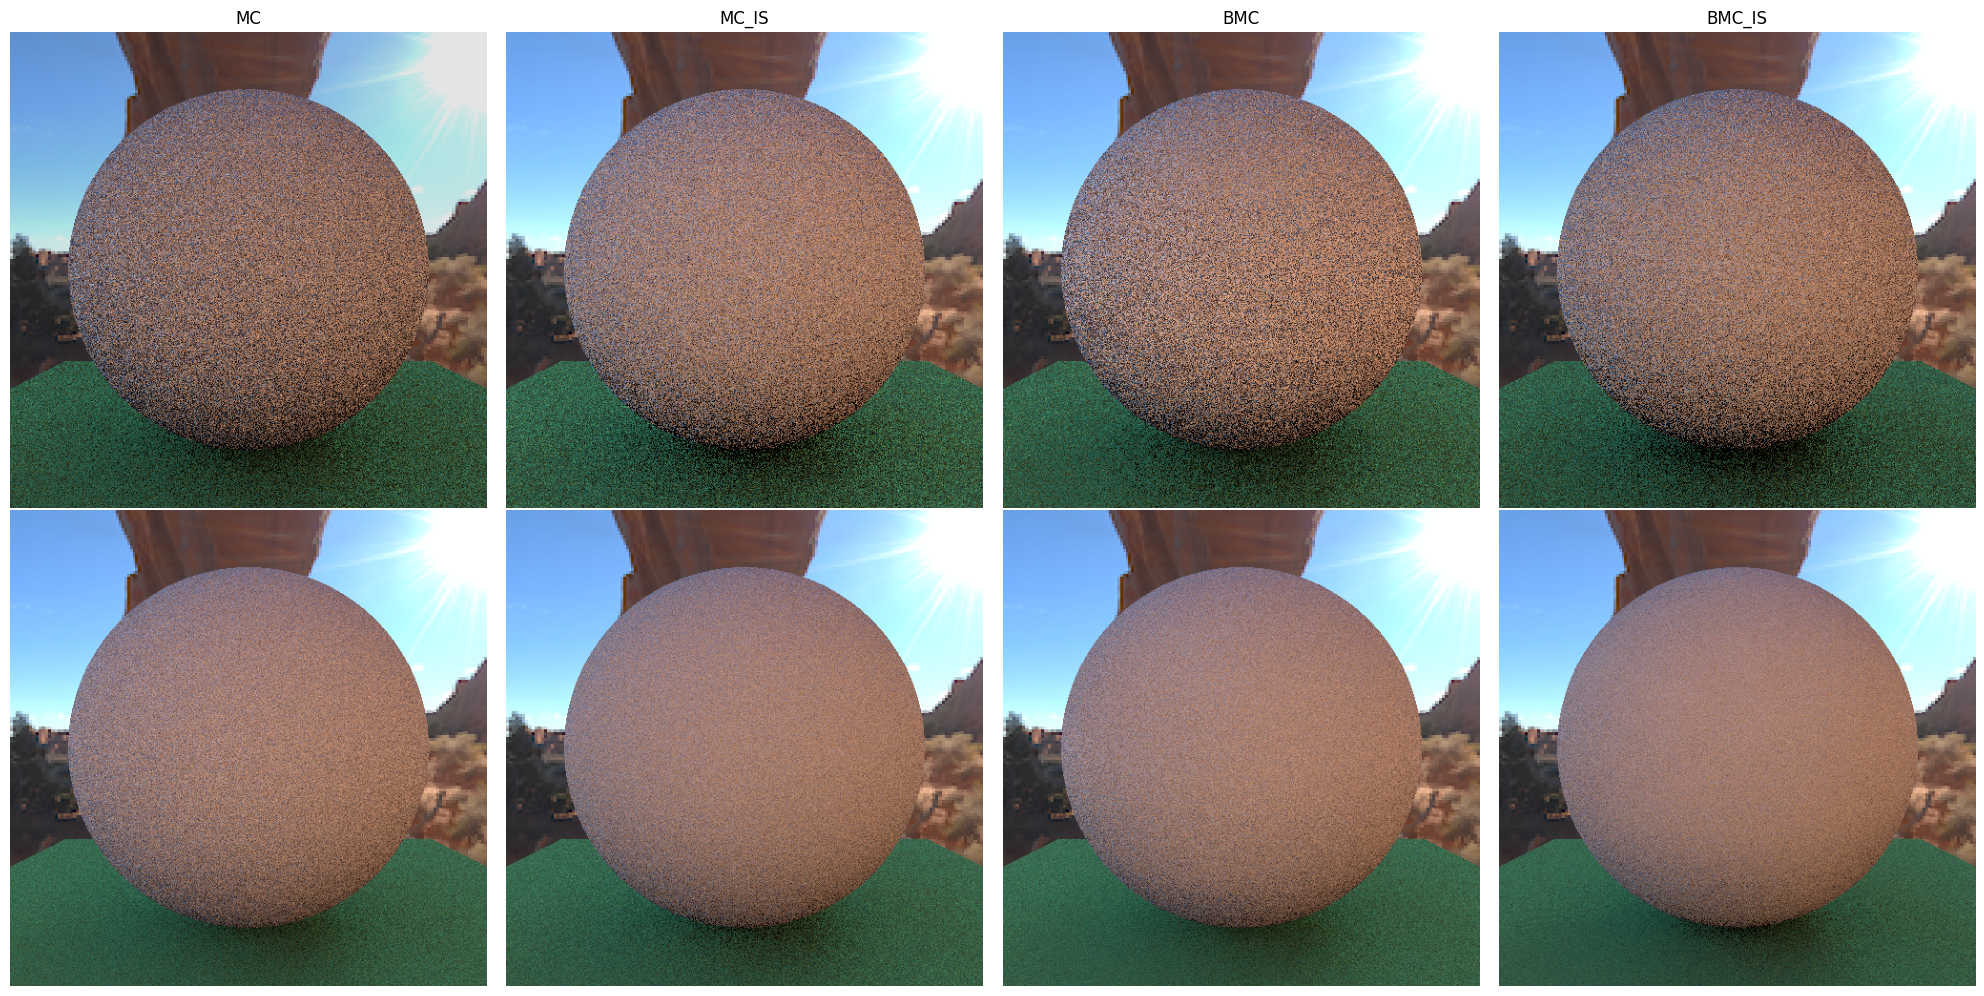

In [16]:
# Create a plot with the images
import matplotlib.pyplot as plt

# create figure and axis objects with subplots() where the number of rows are the methods and the number of columns are the samples
fig, ax = plt.subplots(nrows=number_of_samples, ncols=number_of_methods, figsize=(20, 10), dpi=100)
map_ax_to_method = {'MC': 0, 'MC_IS': 1, 'BMC': 2, 'BMC_IS': 3}
map_ax_to_sample = {5: 0, 20: 1}

for i, method in enumerate(sorted(os.listdir(results_path))):
    method_path = os.path.join(results_path, method)
    image_list = [image for image in os.listdir(method_path) if image.endswith('.png')]
    for j, image in enumerate(sorted(image_list)):
            path = os.path.join(method_path, image)
            print("Plotting", path)
            # Get the samples value using hte first number of the image name 
            # First divide the image name by the underscore
            image_name = image.split('_')
            # Get the first number
            for string in image_name:
                if string.isdigit():
                    samples = int(string)
                    break
            print("Samples: ", samples)
            
            img = cv2.imread(path)
            
            correct_i = map_ax_to_method[method]
            correct_j = map_ax_to_sample[samples]
            ax[correct_j,correct_i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            # Disable the axis
            ax[correct_j,correct_i].axis('off')
            
    # Add the method name to the first row
    ax[0, map_ax_to_method[method]].set_title(method)

plt.tight_layout()
plt.show()

Plotting out/Results/BMC/rendered_image_BMC_20_GP_5_samples.png
Samples:  20
Plotting out/Results/BMC/rendered_image_BMC_5_GP_5_samples.png
Samples:  5
Plotting out/Results/BMC_IS/rendered_image_BMC_IS_20_GP_5_samples.png
Samples:  20
Plotting out/Results/BMC_IS/rendered_image_BMC_IS_5_GP_5_samples.png
Samples:  5
Plotting out/Results/MC/rendered_image_MC_20_samples.png
Samples:  20
Plotting out/Results/MC/rendered_image_MC_5_samples.png
Samples:  5
Plotting out/Results/MC_IS/rendered_image_MC_IS_20_samples.png
Samples:  20
Plotting out/Results/MC_IS/rendered_image_MC_IS_5_samples.png
Samples:  5


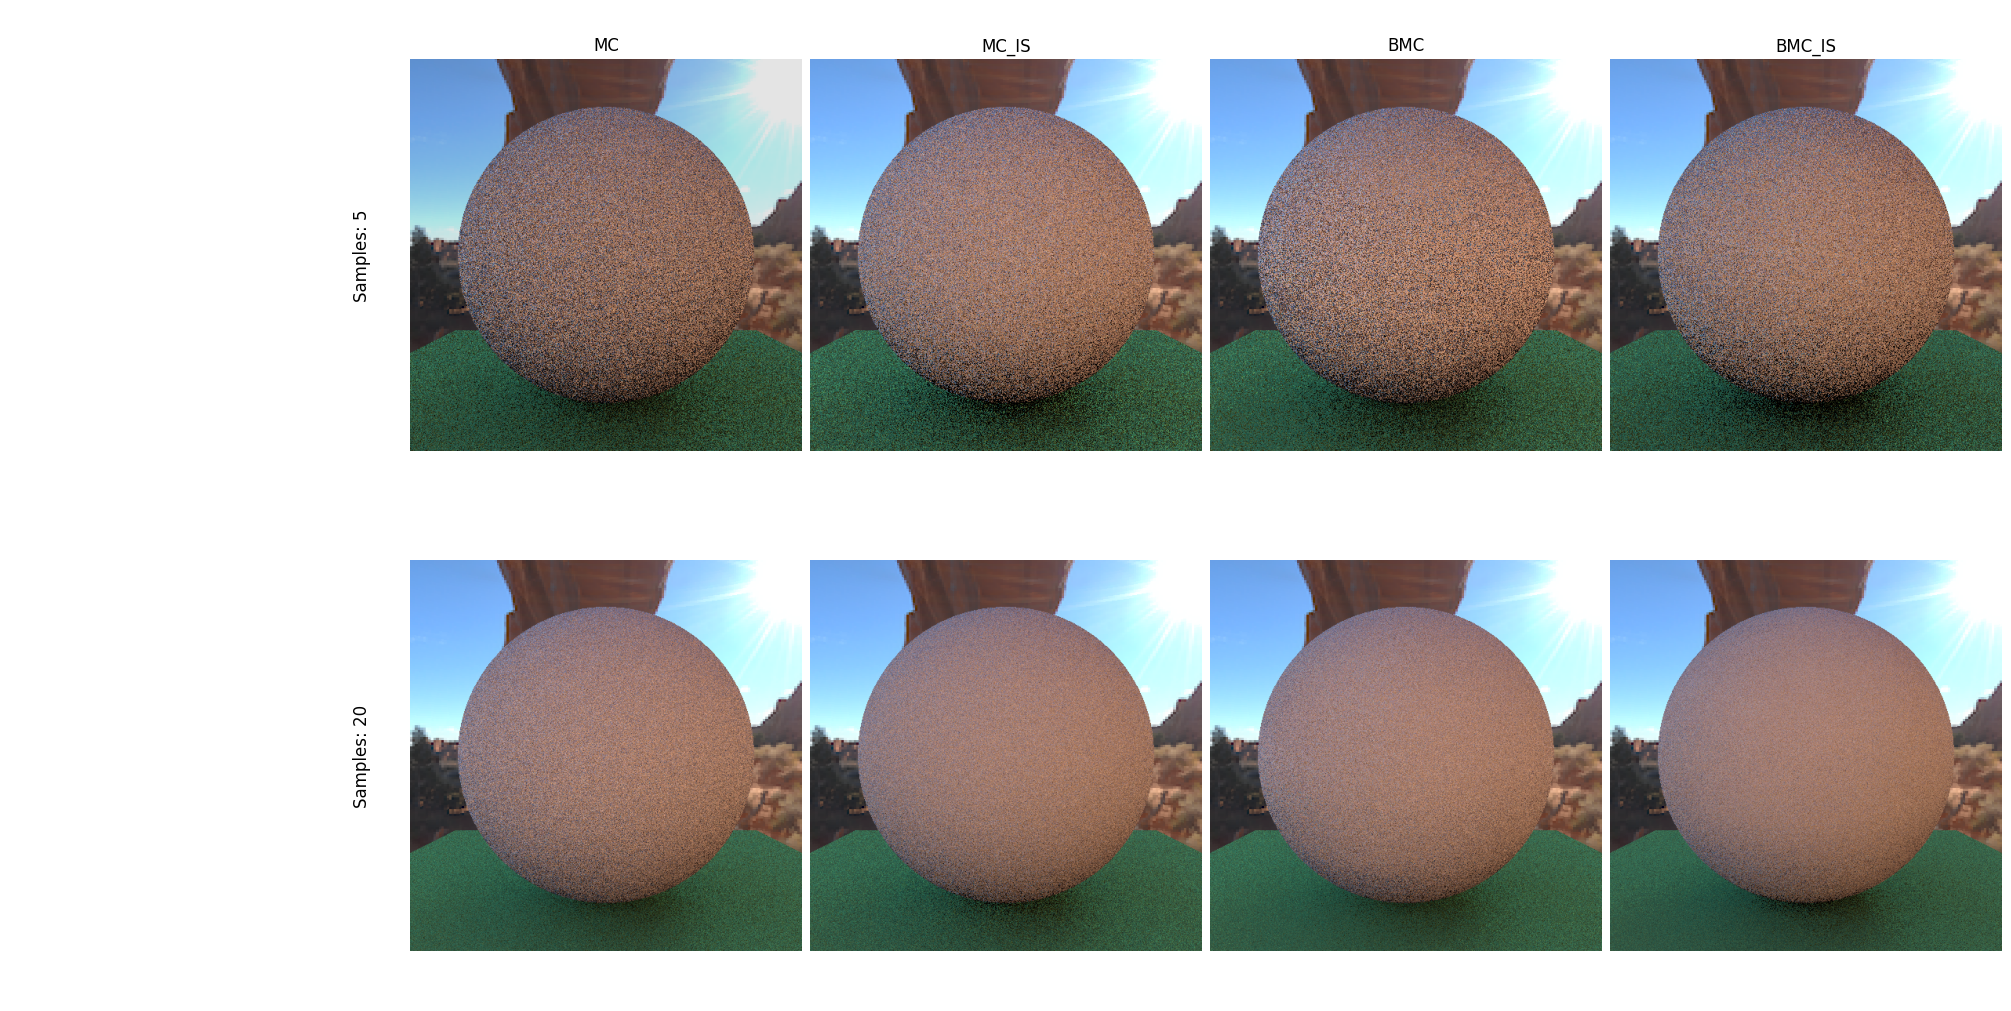

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

# Assuming the following dictionaries are defined
number_of_samples = 2  # Example: 2 sample values (5 and 20)
number_of_methods = 4  # Example: 4 methods ('MC', 'MC_IS', 'BMC', 'BMC_IS')
map_ax_to_method = {'MC': 0, 'MC_IS': 1, 'BMC': 2, 'BMC_IS': 3}
map_ax_to_sample = {5: 0, 20: 1}

# Create figure and axis objects with subplots()
fig, ax = plt.subplots(nrows=number_of_samples, ncols=number_of_methods + 1, figsize=(20, 10), dpi=100, constrained_layout=True)

# Remove the axis for the sample labels column
for row in range(number_of_samples):
    ax[row, 0].axis('off')

for i, method in enumerate(sorted(os.listdir(results_path))):
    method_path = os.path.join(results_path, method)
    image_list = [image for image in os.listdir(method_path) if image.endswith('.png')]
    for j, image in enumerate(sorted(image_list)):
        path = os.path.join(method_path, image)
        print("Plotting", path)
        # Get the samples value using the first number of the image name 
        image_name = image.split('_')
        for string in image_name:
            if string.isdigit():
                samples = int(string)
                break
        print("Samples: ", samples)
        
        img = cv2.imread(path)
        
        correct_i = map_ax_to_method[method]
        correct_j = map_ax_to_sample[samples]
        ax[correct_j, correct_i + 1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[correct_j, correct_i + 1].axis('off')
        
    # Add the method name to the first row
    ax[0, map_ax_to_method[method] + 1].set_title(method)

# Add the sample values to the first column as row labels
for samples, row_index in map_ax_to_sample.items():
    fig.add_subplot(ax[row_index, 0]).text(0.9, 0.5, f"Samples: {samples}", ha='center', va='center', rotation=90, fontsize=12)

plt.show()